In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
data=pd.read_csv('/home/moglix/dataset/train.csv')

In [3]:
data.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [5]:
data.shape

(30000, 24)

In [6]:
pd.set_option('display.max_columns', None)
data.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [7]:
customer_id=data["Customer ID"]
names=data["Name"]

In [8]:
data.drop(columns=["Customer ID","Name"],axis=1,inplace=True)

In [9]:
data.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


**Categorical Features**

In [10]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=="O"]

In [11]:
categorical_features

['Gender',
 'Income Stability',
 'Profession',
 'Type of Employment',
 'Location',
 'Expense Type 1',
 'Expense Type 2',
 'Has Active Credit Card',
 'Property Location']

**Numerical Features**

In [12]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!="O" and feature!="Loan Sanction Amount (USD)"]

In [13]:
numerical_features

['Age',
 'Income (USD)',
 'Loan Amount Request (USD)',
 'Current Loan Expenses (USD)',
 'Dependents',
 'Credit Score',
 'No. of Defaults',
 'Property ID',
 'Property Age',
 'Property Type',
 'Co-Applicant',
 'Property Price']

**Lets Explore Our Categorical Features !!!**

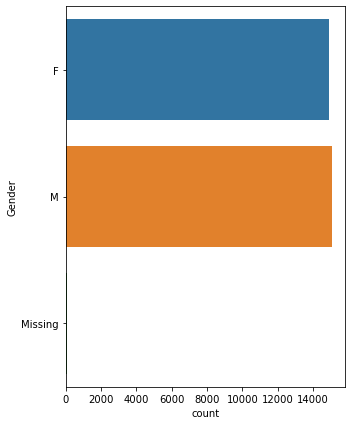

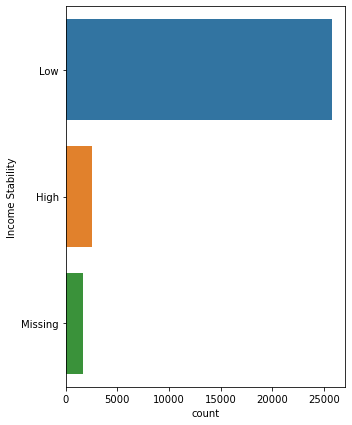

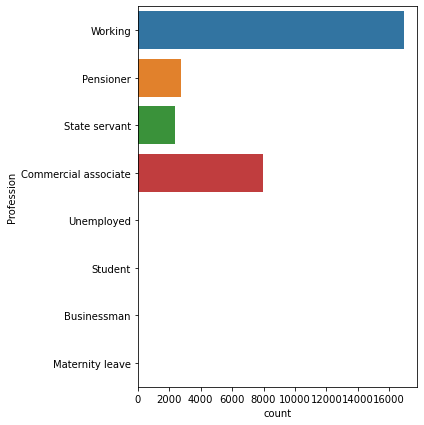

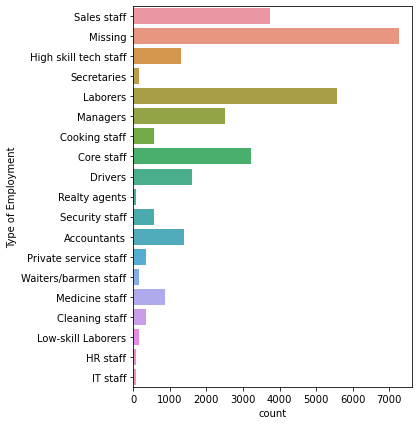

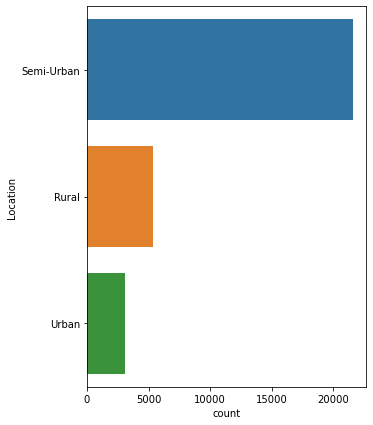

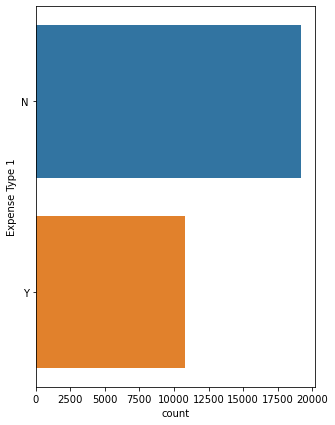

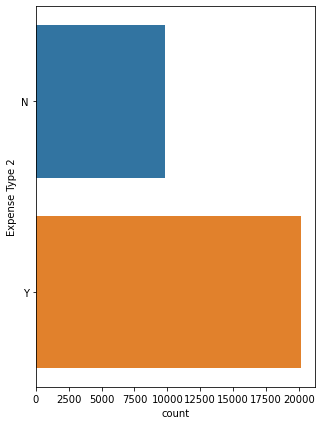

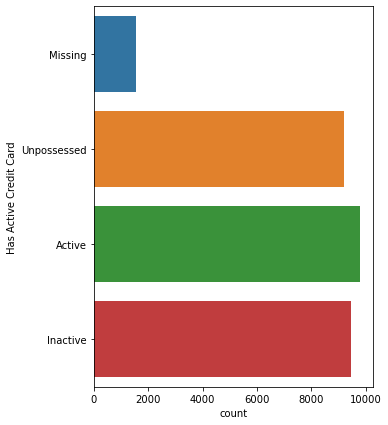

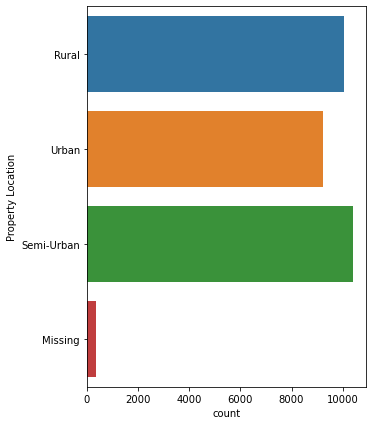

In [14]:
for feature in categorical_features :
    df=data.copy()
    df[feature]=np.where(df[feature].isnull(),"Missing",df[feature])
    plt.figure(figsize=(5,7))
    sns.countplot(y=feature,data=df)
    plt.show()

<AxesSubplot:xlabel='Type of Employment', ylabel='Loan Sanction Amount (USD)'>

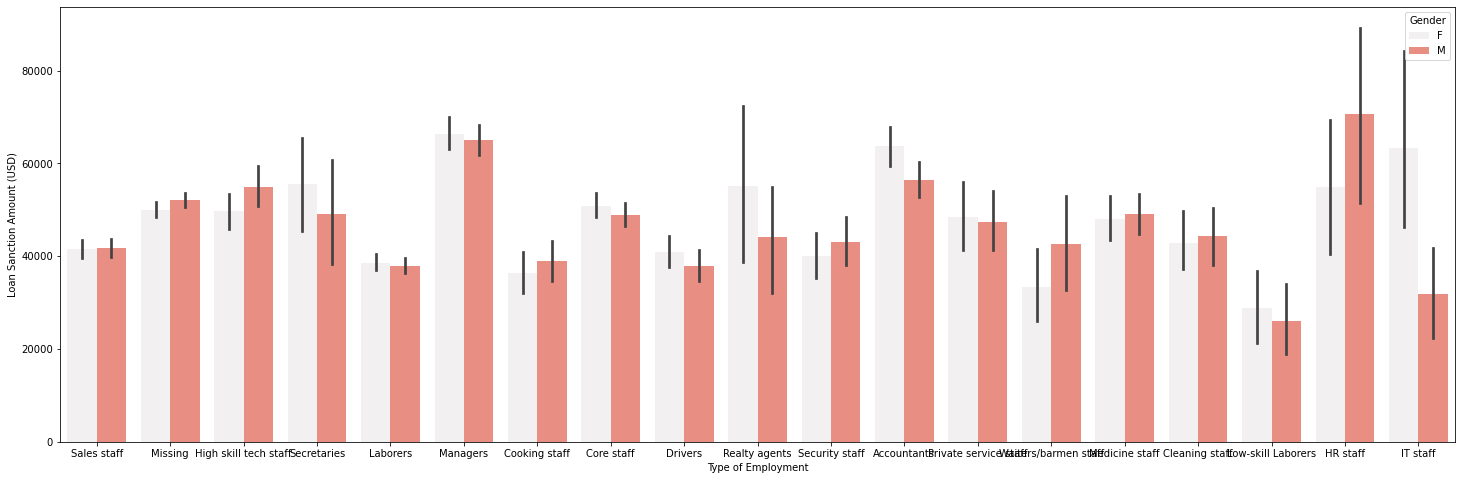

In [15]:
plt.figure(figsize=(25,8))
df=data.copy()
df["Type of Employment"]=np.where(df["Type of Employment"].isnull(),"Missing",df["Type of Employment"])
sns.barplot(x="Type of Employment",y="Loan Sanction Amount (USD)",hue="Gender",data=df, color="salmon")

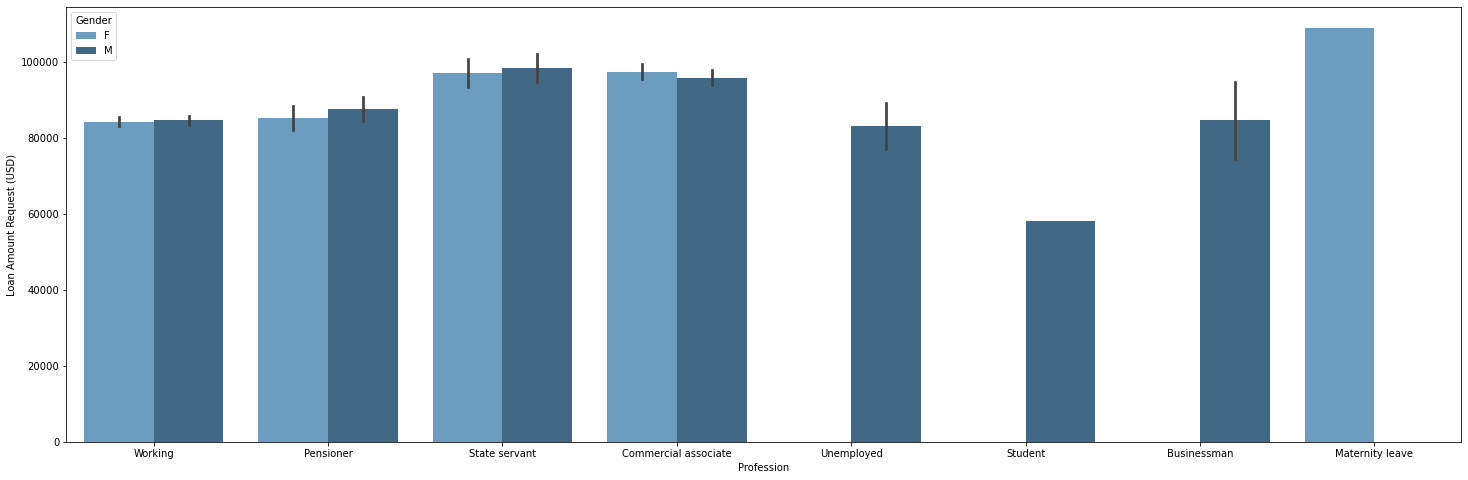

In [16]:
plt.figure(figsize=(25,8))
df=data.copy()
df["Profession"]=np.where(df["Profession"].isnull(),"Missing",df["Profession"])
sns.barplot(x="Profession",y="Loan Amount Request (USD)",hue="Gender",data=df,palette="Blues_d")
plt.show()

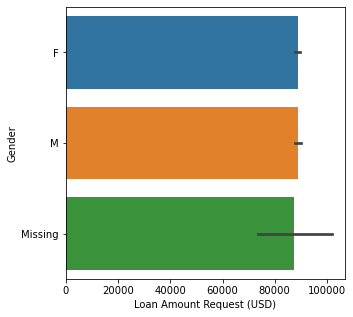

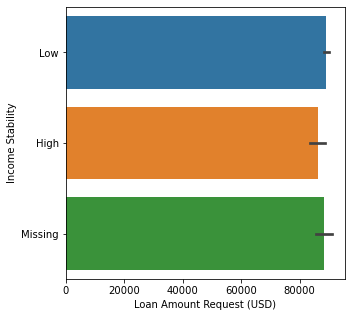

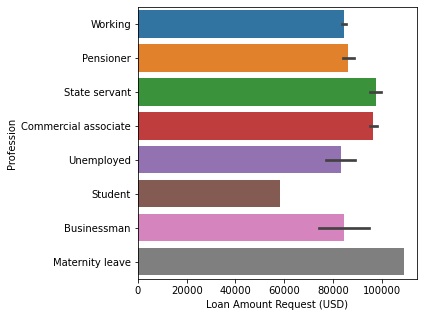

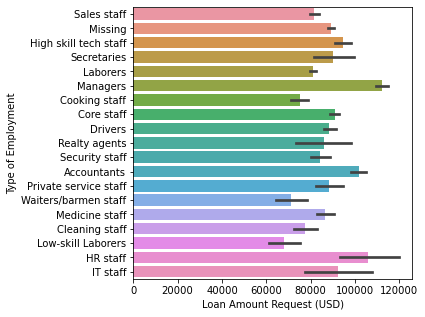

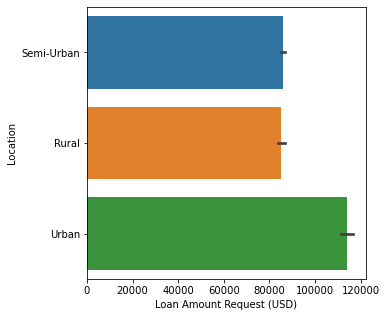

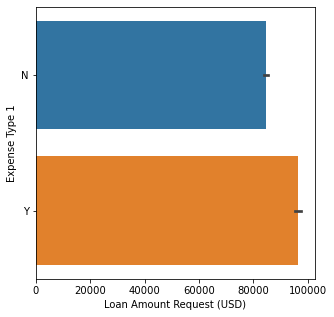

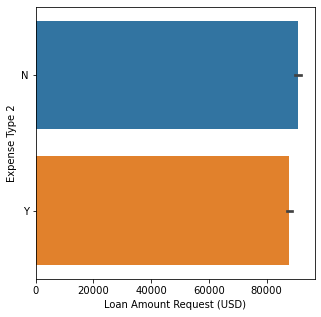

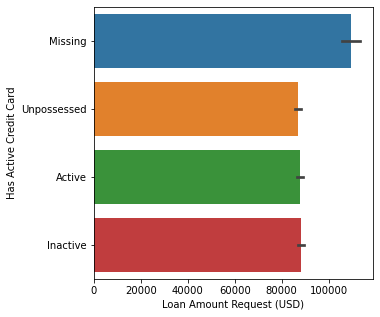

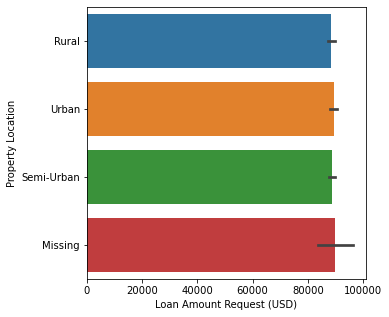

In [17]:
for feature in categorical_features :
    df=data.copy()
    df[feature]=np.where(df[feature].isnull(),"Missing",df[feature])
    plt.figure(figsize=(5,5))
    sns.barplot(x="Loan Amount Request (USD)",y=feature,data=df)
    plt.show()

<AxesSubplot:xlabel='Expense Type 1', ylabel='Loan Amount Request (USD)'>

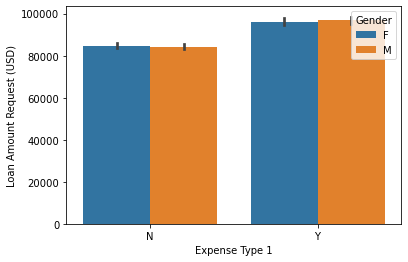

In [18]:
sns.barplot(x="Expense Type 1", y="Loan Amount Request (USD)",hue="Gender",data=data)

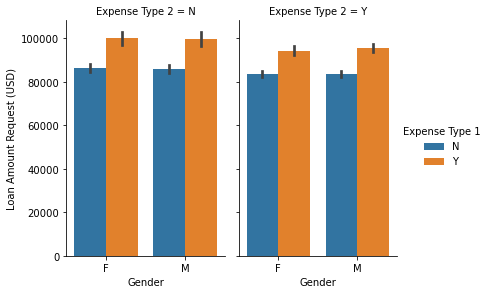

In [19]:
sns.catplot(x="Gender", hue="Expense Type 1", col="Expense Type 2",
                data=data,y="Loan Amount Request (USD)",kind="bar",
                height=4, aspect=.7);

In [20]:
categories_with_Nan=[feature for feature in categorical_features if data[feature].isnull().sum()>0]

In [21]:
categories_with_Nan
df['Profession'].value_counts()

Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Businessman                 2
Unemployed                  2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64

**Observations**

1. We have 5 categories with nan values that need to be handled.

2. People with less income stability , Working professional has applied more for the loans.

3. Highest Loan amount request was made by Maternity Leave professional.

4. Male hr staff got highest loan sanctioned.

5. Hr and labour working professional has applied more for the loan amount.

6. From catplot we can see that people having expense type 1 and not having expense type 2 have requested for more loan amount.

**Lets Explore Our Numerical Features**

In [22]:
data[numerical_features].isnull().sum()

Age                               0
Income (USD)                   4576
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Property ID                       0
Property Age                   4850
Property Type                     0
Co-Applicant                      0
Property Price                    0
dtype: int64

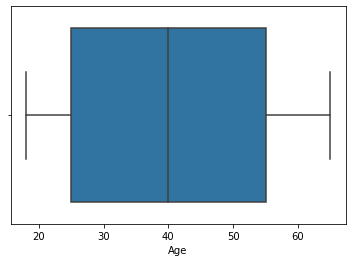

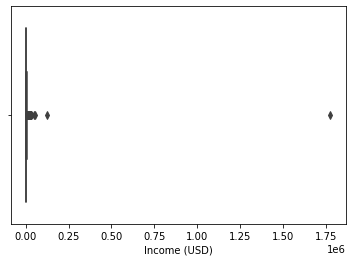

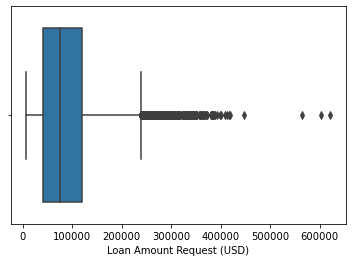

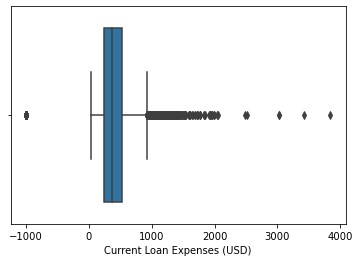

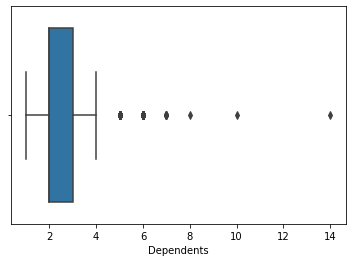

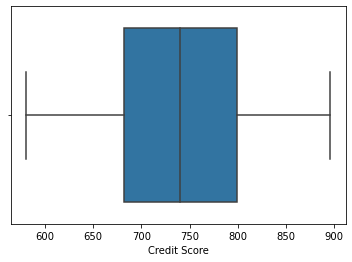

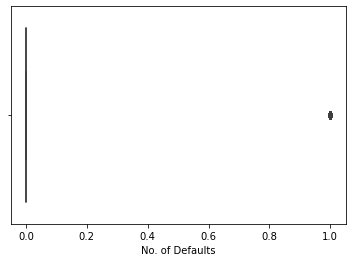

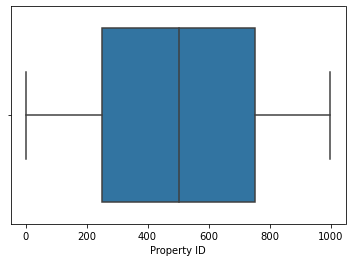

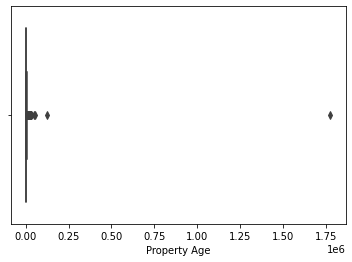

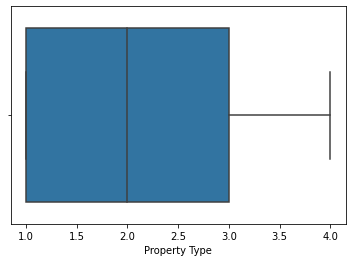

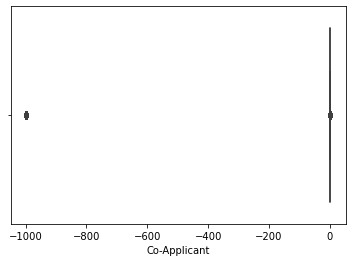

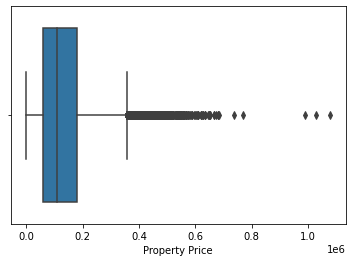

In [23]:
for feature in numerical_features :
    df=data.copy()
    df.fillna(0)
    sns.boxplot(x=feature ,data=df)
    plt.show()

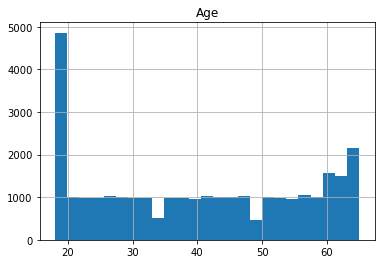

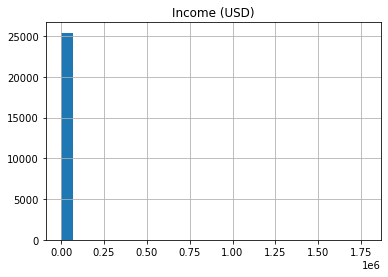

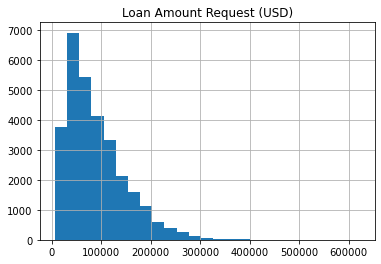

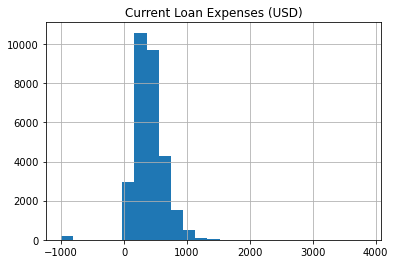

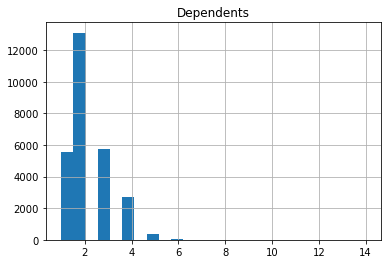

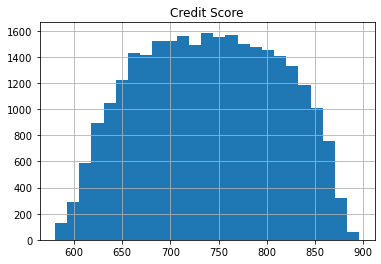

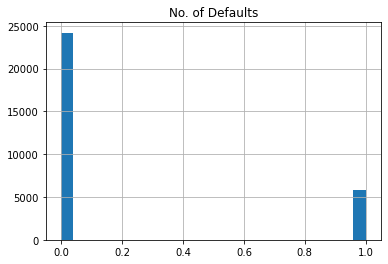

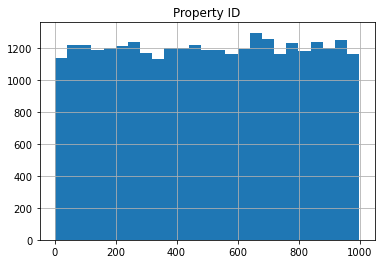

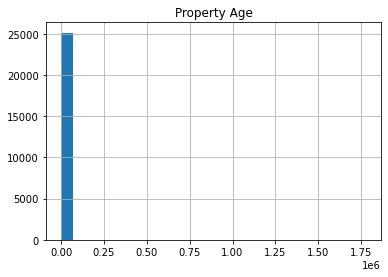

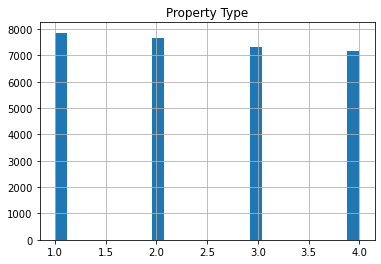

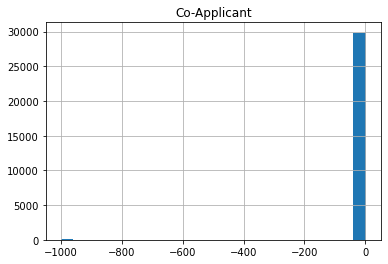

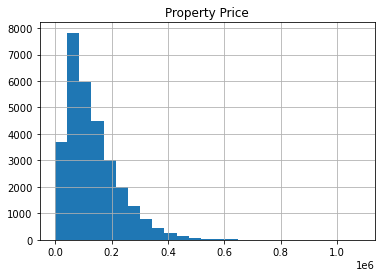

In [24]:
for feature in numerical_features :
    df=data.copy()
    df.fillna(0)
    df[feature].hist(bins=25)    
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='Loan Amount Request (USD)', ylabel='Loan Sanction Amount (USD)'>

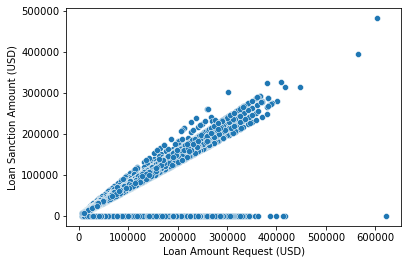

In [25]:
sns.scatterplot(x=df["Loan Amount Request (USD)"],y=df["Loan Sanction Amount (USD)"])
   

<AxesSubplot:xlabel='Property Price', ylabel='Loan Sanction Amount (USD)'>

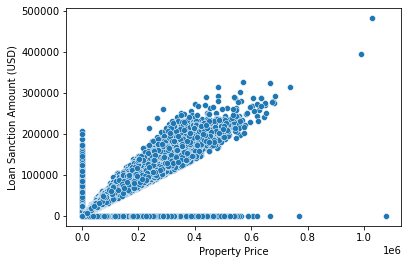

In [26]:
sns.scatterplot(x="Property Price",y="Loan Sanction Amount (USD)",data=df)

Text(0, 0.5, 'Loan Sanction Amount (USD)')

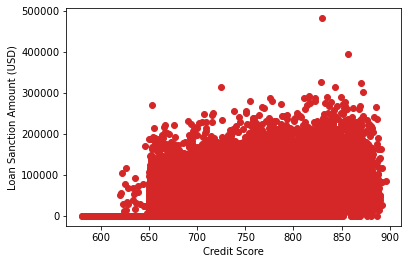

In [27]:
plt.scatter(x="Credit Score",y="Loan Sanction Amount (USD)",data=df,c='#d62728')
plt.xlabel("Credit Score")
plt.ylabel("Loan Sanction Amount (USD)")

<AxesSubplot:xlabel='Property Price', ylabel='Loan Amount Request (USD)'>

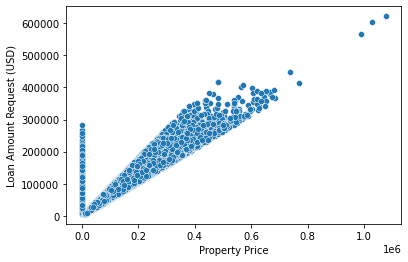

In [28]:
sns.scatterplot(x="Property Price",y="Loan Amount Request (USD)",data=df)

Text(0, 0.5, 'Loan Sanction Amount (USD)')

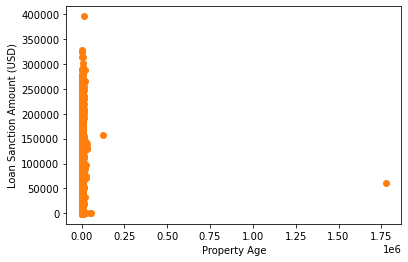

In [29]:
plt.scatter(x="Property Age",y="Loan Sanction Amount (USD)",data=df,c='#ff7f0e')
plt.xlabel("Property Age")
plt.ylabel("Loan Sanction Amount (USD)")

<AxesSubplot:xlabel='Age', ylabel='Loan Sanction Amount (USD)'>

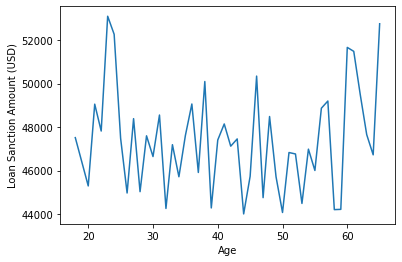

In [30]:
sns.lineplot(x="Age",y="Loan Sanction Amount (USD)",data=df)

<AxesSubplot:>

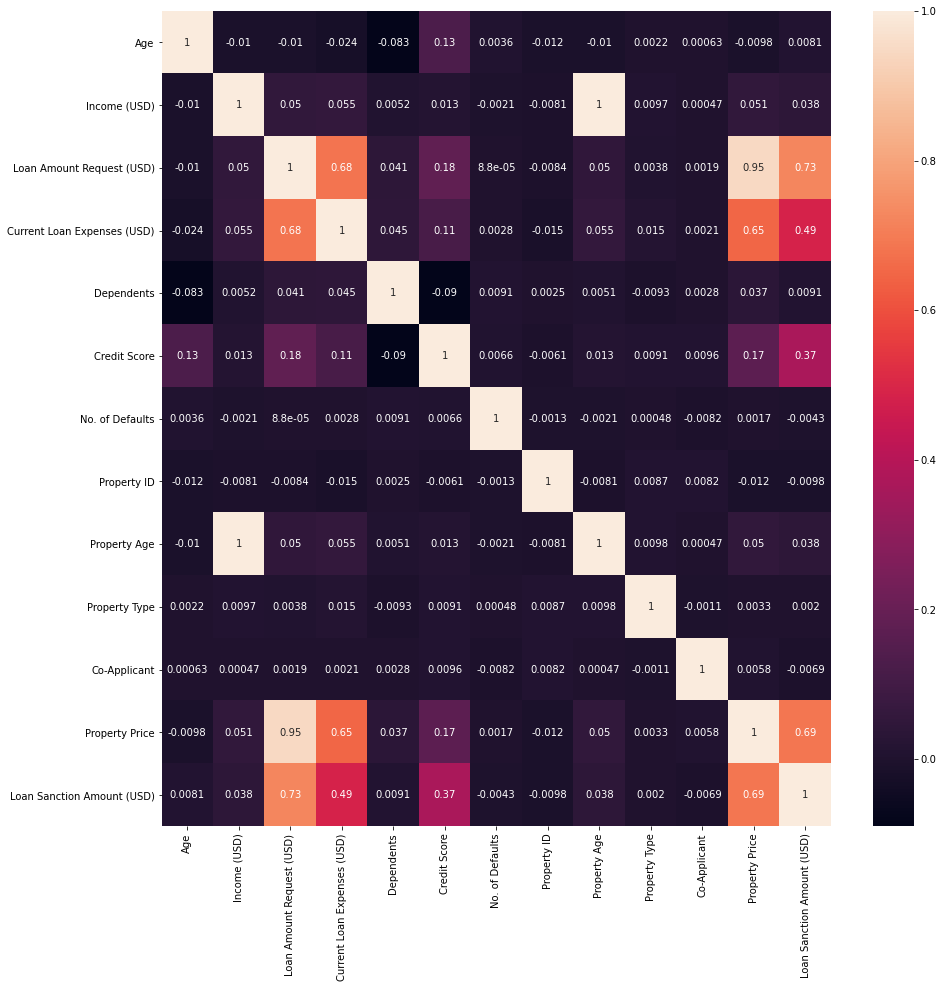

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [32]:
num_with_nan=[feature for feature in numerical_features if data[feature].isnull().sum()>1]
num_with_nan

['Income (USD)',
 'Current Loan Expenses (USD)',
 'Dependents',
 'Credit Score',
 'Property Age']

**Observations**

1. Observed skewness in data.

2. Some of the features have very high correlation .

3. Prescence of outliers detected.

4. The age group betweeen 20 - 40 have high loan amount sanctioned.

5. Property Price and loan sanctioned amnount is linearly correlated.

6. Income and property age has been observed to have very high correlation .

7. A person can request high loan amount having high property price.


## Data Preparation

In [33]:
data.head()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,Expense Type 2,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,241.08,N,N,3.0,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,495.81,N,Y,1.0,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,171.95,N,Y,1.0,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,298.54,N,Y,2.0,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,491.41,N,Y,NaN,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [34]:
data.drop("Property ID",axis=1,inplace=True)

In [35]:
data[categories_with_Nan].isnull().sum()

Gender                      53
Income Stability          1683
Type of Employment        7270
Has Active Credit Card    1566
Property Location          356
dtype: int64

In [36]:
data_with_nan=data.copy()
data_without_nan=data.copy()

In [37]:
for feature in categories_with_Nan :
    print(data[feature].value_counts())

M    15053
F    14894
Name: Gender, dtype: int64
Low     25751
High     2566
Name: Income Stability, dtype: int64
Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64
Active         9771
Inactive       9466
Unpossessed    9197
Name: Has Active Credit Card, dtype: int64
Semi-Urban    10387
Rural         10041
Urban          9216
Name: Property Location, dtype: int64


In [38]:
# Drop rows for which we do not have values in dependent feature
data_without_nan.dropna(subset=['Loan Sanction Amount (USD)'],inplace=True)
data_without_nan.shape

(29660, 21)

In [39]:
data_without_nan["Has Active Credit Card"]=data_without_nan["Has Active Credit Card"].fillna("Missing")

In [40]:
data_without_nan["Property Location"]=data_without_nan["Property Location"].fillna("Missing")

<AxesSubplot:xlabel='Income Stability', ylabel='Income (USD)'>

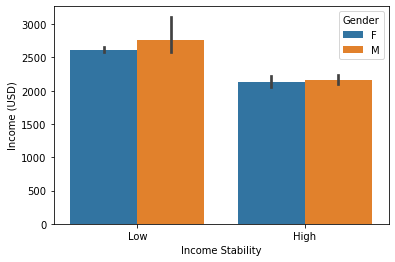

In [41]:
sns.barplot(x="Income Stability",y="Income (USD)",data=data,hue="Gender")

<AxesSubplot:xlabel='Gender', ylabel='count'>

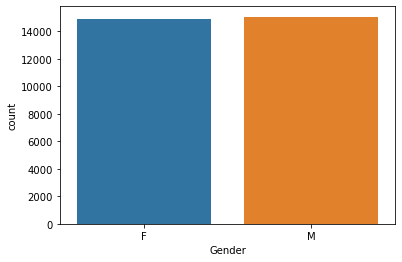

In [42]:
sns.countplot(x="Gender",data=data)

In [43]:
data_without_nan["Income Stability"].value_counts()

Low     25458
High     2544
Name: Income Stability, dtype: int64

In [44]:
data[num_with_nan].isnull().sum()

Income (USD)                   4576
Current Loan Expenses (USD)     172
Dependents                     2493
Credit Score                   1703
Property Age                   4850
dtype: int64

In [45]:
data_without_nan["Current Loan Expenses (USD)"]=data_without_nan["Current Loan Expenses (USD)"].fillna(data["Current Loan Expenses (USD)"].median())

In [46]:
data_without_nan["Dependents"]=data_without_nan["Dependents"].fillna(data_without_nan["Dependents"].median())

In [47]:
data_without_nan["Credit Score"]=data_without_nan["Credit Score"].fillna(data_without_nan["Credit Score"].mean())

*****For above three attributes were of category MCAR and we have found outliers and skewness thats why we used median imputation and in case of credit score we found no skewness and outliers so we did mean imputation in that.*****

In [48]:
feat=[feature for feature in data_without_nan.columns if data_without_nan[feature].isnull().sum()>1]

In [49]:
data_without_nan[feat].isnull().sum()

Gender                  52
Income (USD)          4493
Income Stability      1658
Type of Employment    7188
Property Age          4760
dtype: int64

The Income column has very less missing values and very less outliers so we can do median imputation.

In [50]:
data_without_nan["Income (USD)"]=data_without_nan["Income (USD)"].fillna(data_without_nan["Income (USD)"].median())

In [51]:
data_without_nan["Type of Employment"]=data_without_nan["Type of Employment"].fillna("Other")

In [52]:
data_without_nan[feat].isnull().sum()

Gender                  52
Income (USD)             0
Income Stability      1658
Type of Employment       0
Property Age          4760
dtype: int64

In [53]:
data_without_nan["Income Stability"].value_counts()/data_without_nan["Income Stability"].count()*100

Low     90.914935
High     9.085065
Name: Income Stability, dtype: float64

In [54]:
data_without_nan["Income Stability"].isnull().sum()/data_without_nan["Income Stability"].count()*100

5.92100564245411

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Loan Amount Request (USD)'>

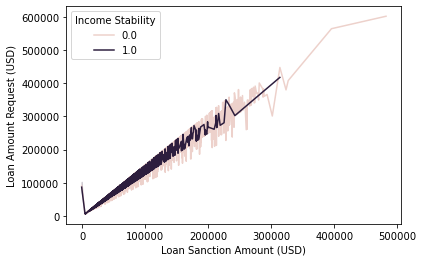

In [55]:
sns.lineplot(x=data["Loan Sanction Amount (USD)"],y=data["Loan Amount Request (USD)"],hue=data_without_nan["Income Stability"].isnull())

****From data  understanding the people have low income stability would be apply more for loan more and according to given data 90% people are having low income stability and around 9 % people having high income stability.We observed only 5% values as missing and graph also depicts that missing values are most likely to be part of Low category so we can fill that missing vaues as Low.****

In [56]:
data_without_nan["Income Stability"]=data_without_nan["Income Stability"].fillna("Low")

In [57]:
data_without_nan["Gender"].value_counts()

M    14890
F    14718
Name: Gender, dtype: int64

In [58]:
data_without_nan["Gender"]=data_without_nan["Gender"].fillna("Missing")

In [59]:
data_without_nan.isnull().sum()

Gender                            0
Age                               0
Income (USD)                      0
Income Stability                  0
Profession                        0
Type of Employment                0
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)       0
Expense Type 1                    0
Expense Type 2                    0
Dependents                        0
Credit Score                      0
No. of Defaults                   0
Has Active Credit Card            0
Property Age                   4760
Property Type                     0
Property Location                 0
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)        0
dtype: int64

**Encoding Data**

In [60]:
for feature in categorical_features :
    print(data_without_nan[feature].value_counts())

M          14890
F          14718
Missing       52
Name: Gender, dtype: int64
Low     27116
High     2544
Name: Income Stability, dtype: int64
Working                 16739
Commercial associate     7863
Pensioner                2718
State servant            2334
Businessman                 2
Unemployed                  2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64
Other                    7188
Laborers                 5516
Sales staff              3698
Core staff               3189
Managers                 2464
Drivers                  1588
Accountants              1363
High skill tech staff    1297
Medicine staff            854
Security staff            574
Cooking staff             561
Cleaning staff            338
Private service staff     337
Secretaries               158
Low-skill Laborers        154
Waiters/barmen staff      148
Realty agents              85
IT staff                   77
HR staff                   71
Name: Type of Em

***Handling very rare categories***

In [61]:
# Our profession column has some of the rare labels that occured one or two time so we can group them under rare_label tag 
categories=['Businessman','Unemployed','Student','Maternity leave']
for  feature in categories :
    data_without_nan["Profession"]=np.where(data_without_nan["Profession"]==feature,"Rar_var",data_without_nan["Profession"])

In [62]:
data_without_nan["Profession"].value_counts()

Working                 16739
Commercial associate     7863
Pensioner                2718
State servant            2334
Rar_var                     6
Name: Profession, dtype: int64

****Encoding techniques----****
We will do one hot encoding in Expense type1 and Type2 and Income Stability as they only contains two categories

In [63]:
data_without_nan=pd.get_dummies(columns=["Expense Type 1","Expense Type 2","Income Stability"],drop_first=True,data=data_without_nan)

***Tried using Binary Encoding becuase no. of categories were large***

In [64]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Type of Employment'])
data_without_nan= encoder.fit_transform(data_without_nan)
data_without_nan.head()

/home/moglix/anaconda3/lib/python3.8/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,Gender,Age,Income (USD),Profession,Type of Employment_0,Type of Employment_1,Type of Employment_2,Type of Employment_3,Type of Employment_4,Type of Employment_5,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Expense Type 1_Y,Expense Type 2_Y,Income Stability_Low
0,F,56,1933.05,Working,0,0,0,0,0,1,Semi-Urban,72809.58,241.08,3.0,809.44,0,Missing,1933.05,4,Rural,1,119933.46,54607.18,0,0,1
1,M,32,4952.91,Working,0,0,0,0,1,0,Semi-Urban,46837.47,495.81,1.0,780.40,0,Unpossessed,4952.91,2,Rural,1,54791.00,37469.98,0,1,1
2,F,65,988.19,Pensioner,0,0,0,0,1,0,Semi-Urban,45593.04,171.95,1.0,833.15,0,Unpossessed,988.19,2,Urban,0,72440.58,36474.43,0,1,0
3,F,65,2223.30,Pensioner,0,0,0,0,1,0,Rural,80057.92,298.54,2.0,832.70,1,Unpossessed,NaN,2,Semi-Urban,1,121441.51,56040.54,0,1,0
4,F,31,2614.77,Working,0,0,0,0,1,1,Semi-Urban,113858.89,491.41,2.0,745.55,1,Active,2614.77,4,Semi-Urban,1,208567.91,74008.28,0,1,1


In [65]:
data_without_nan=pd.get_dummies(columns=['Gender','Has Active Credit Card'],data=data_without_nan)

In [66]:
data_without_nan.drop(columns=['Gender_Missing','Has Active Credit Card_Missing'],axis=1,inplace=True)
data_without_nan.head()

,Age,Income (USD),Profession,Type of Employment_0,Type of Employment_1,Type of Employment_2,Type of Employment_3,Type of Employment_4,Type of Employment_5,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Expense Type 1_Y,Expense Type 2_Y,Income Stability_Low,Gender_F,Gender_M,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed
0,56,1933.05,Working,0,0,0,0,0,1,Semi-Urban,72809.58,241.08,3.0,809.44,0,1933.05,4,Rural,1,119933.46,54607.18,0,0,1,1,0,0,0,0
1,32,4952.91,Working,0,0,0,0,1,0,Semi-Urban,46837.47,495.81,1.0,780.40,0,4952.91,2,Rural,1,54791.00,37469.98,0,1,1,0,1,0,0,1
2,65,988.19,Pensioner,0,0,0,0,1,0,Semi-Urban,45593.04,171.95,1.0,833.15,0,988.19,2,Urban,0,72440.58,36474.43,0,1,0,1,0,0,0,1
3,65,2223.30,Pensioner,0,0,0,0,1,0,Rural,80057.92,298.54,2.0,832.70,1,NaN,2,Semi-Urban,1,121441.51,56040.54,0,1,0,1,0,0,0,1
4,31,2614.77,Working,0,0,0,0,1,1,Semi-Urban,113858.89,491.41,2.0,745.55,1,2614.77,4,Semi-Urban,1,208567.91,74008.28,0,1,1,1,0,1,0,0


In [67]:
data_without_nan.shape

(29660, 29)

In [68]:
data_without_nan=pd.get_dummies(columns=['Location','Profession'],data=data_without_nan,drop_first=True)

In [69]:
data_without_nan.head()

,Age,Income (USD),Type of Employment_0,Type of Employment_1,Type of Employment_2,Type of Employment_3,Type of Employment_4,Type of Employment_5,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD),Expense Type 1_Y,Expense Type 2_Y,Income Stability_Low,Gender_F,Gender_M,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Location_Semi-Urban,Location_Urban,Profession_Pensioner,Profession_Rar_var,Profession_State servant,Profession_Working
0,56,1933.05,0,0,0,0,0,1,72809.58,241.08,3.0,809.44,0,1933.05,4,Rural,1,119933.46,54607.18,0,0,1,1,0,0,0,0,1,0,0,0,0,1
1,32,4952.91,0,0,0,0,1,0,46837.47,495.81,1.0,780.40,0,4952.91,2,Rural,1,54791.00,37469.98,0,1,1,0,1,0,0,1,1,0,0,0,0,1
2,65,988.19,0,0,0,0,1,0,45593.04,171.95,1.0,833.15,0,988.19,2,Urban,0,72440.58,36474.43,0,1,0,1,0,0,0,1,1,0,1,0,0,0
3,65,2223.30,0,0,0,0,1,0,80057.92,298.54,2.0,832.70,1,NaN,2,Semi-Urban,1,121441.51,56040.54,0,1,0,1,0,0,0,1,0,0,1,0,0,0
4,31,2614.77,0,0,0,0,1,1,113858.89,491.41,2.0,745.55,1,2614.77,4,Semi-Urban,1,208567.91,74008.28,0,1,1,1,0,1,0,0,1,0,0,0,0,1


In [70]:
data_without_nan=pd.get_dummies(columns=['Property Location'],data=data_without_nan,drop_first=True)

In [71]:
data_without_nan.shape

(29660, 35)

**Handling Outliers and skeness of numerical features**

In [72]:
IQR=data_without_nan['Current Loan Expenses (USD)'].quantile(0.75)-data_without_nan['Current Loan Expenses (USD)'].quantile(0.25)
lower_bridge=data_without_nan['Current Loan Expenses (USD)'].quantile(0.25)-(IQR*1.5)
upper_bridge=data_without_nan['Current Loan Expenses (USD)'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-158.21000000000012
926.9300000000002


(None, None)

In [73]:
data_without_nan['Current Loan Expenses (USD)']=np.where(data_without_nan['Current Loan Expenses (USD)']>upper_bridge,upper_bridge,data_without_nan['Current Loan Expenses (USD)'])

In [74]:
data_without_nan['Current Loan Expenses (USD)']=np.where(data_without_nan['Current Loan Expenses (USD)']<0,0,data_without_nan['Current Loan Expenses (USD)'])

In [75]:
IQR=data_without_nan['Loan Amount Request (USD)'].quantile(0.75)-data_without_nan['Loan Amount Request (USD)'].quantile(0.25)
lower_bridge=data_without_nan['Loan Amount Request (USD)'].quantile(0.25)-(IQR*1.5)
upper_bridge=data_without_nan['Loan Amount Request (USD)'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-76836.00499999999
237926.97499999998


(None, None)

In [76]:
data_without_nan['Current Loan Expenses (USD)']=np.where(data_without_nan['Loan Amount Request (USD)']>upper_bridge,upper_bridge,data_without_nan['Loan Amount Request (USD)'])

In [77]:
data_without_nan.head()

,Age,Income (USD),Type of Employment_0,Type of Employment_1,Type of Employment_2,Type of Employment_3,Type of Employment_4,Type of Employment_5,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Expense Type 1_Y,Expense Type 2_Y,Income Stability_Low,Gender_F,Gender_M,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Location_Semi-Urban,Location_Urban,Profession_Pensioner,Profession_Rar_var,Profession_State servant,Profession_Working,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,56,1933.05,0,0,0,0,0,1,72809.58,72809.58,3.0,809.44,0,1933.05,4,1,119933.46,54607.18,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0
1,32,4952.91,0,0,0,0,1,0,46837.47,46837.47,1.0,780.40,0,4952.91,2,1,54791.00,37469.98,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0
2,65,988.19,0,0,0,0,1,0,45593.04,45593.04,1.0,833.15,0,988.19,2,0,72440.58,36474.43,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1
3,65,2223.30,0,0,0,0,1,0,80057.92,80057.92,2.0,832.70,1,NaN,2,1,121441.51,56040.54,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,31,2614.77,0,0,0,0,1,1,113858.89,113858.89,2.0,745.55,1,2614.77,4,1,208567.91,74008.28,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0


**Scaling**

In [78]:
data_without_scaling=data_without_nan.copy()

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data=pd.DataFrame(scaler.fit_transform(data_without_nan),columns=data_without_nan.columns)

In [80]:
scaled_data.head()

,Age,Income (USD),Type of Employment_0,Type of Employment_1,Type of Employment_2,Type of Employment_3,Type of Employment_4,Type of Employment_5,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Expense Type 1_Y,Expense Type 2_Y,Income Stability_Low,Gender_F,Gender_M,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Location_Semi-Urban,Location_Urban,Profession_Pensioner,Profession_Rar_var,Profession_State servant,Profession_Working,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,0.990718,-0.061011,0.0,-0.148505,-0.614918,-0.790193,-0.902810,1.011803,-0.268703,-0.266582,0.839226,0.992814,-0.490710,-0.061369,1.376616,0.076750,-0.126312,0.144293,-0.749912,-1.433272,0.306299,1.007581,-1.004054,-0.695409,-0.679031,-0.664549,0.625602,-0.339357,-0.317621,-0.014224,-0.292255,0.878584,1.409684,-0.726961,-0.666817
1,-0.504632,0.228599,0.0,-0.148505,-0.614918,-0.790193,1.107652,-0.988335,-0.705356,-0.729023,-1.347686,0.578491,-0.490710,0.204041,-0.411213,0.076750,-0.823622,-0.211101,-0.749912,0.697704,0.306299,-0.992476,0.995962,-0.695409,-0.679031,1.504780,0.625602,-0.339357,-0.317621,-0.014224,-0.292255,0.878584,1.409684,-0.726961,-0.666817
2,1.551474,-0.151625,0.0,-0.148505,-0.614918,-0.790193,1.107652,-0.988335,-0.726278,-0.751180,-1.347686,1.331092,-0.490710,-0.144412,-0.411213,0.063304,-0.634694,-0.231747,-0.749912,0.697704,-3.264783,1.007581,-1.004054,-0.695409,-0.679031,1.504780,0.625602,-0.339357,3.148402,-0.014224,-0.292255,-1.138195,-0.709379,-0.726961,1.499662
3,1.551474,-0.033176,0.0,-0.148505,-0.614918,-0.790193,1.107652,-0.988335,-0.146842,-0.137523,-0.254230,1.324672,2.037863,NaN,-0.411213,0.076750,-0.110170,0.174018,-0.749912,0.697704,-3.264783,1.007581,-1.004054,-0.695409,-0.679031,1.504780,-1.598461,-0.339357,3.148402,-0.014224,-0.292255,-1.138195,-0.709379,1.375590,-0.666817
4,-0.566939,0.004367,0.0,-0.148505,-0.614918,-0.790193,1.107652,1.011803,0.421433,0.464313,-0.254230,0.081274,2.037863,-0.001454,1.376616,0.076750,0.822464,0.546635,-0.749912,0.697704,0.306299,1.007581,-1.004054,1.438003,-0.679031,-0.664549,0.625602,-0.339357,-0.317621,-0.014224,-0.292255,0.878584,-0.709379,1.375590,-0.666817


# Feature Selection

In [81]:
# Test train split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_data.drop(labels=['Loan Sanction Amount (USD)'], axis=1),
    scaled_data['Loan Sanction Amount (USD)'],
    test_size=0.4,
    random_state=0)

In [82]:
X_train.shape

(17796, 34)

In [83]:
X_test.shape

(11864, 34)

In [84]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.00000000e+00, 7.63468510e-02, 0.00000000e+00, 2.52305034e-03,
       0.00000000e+00, 1.34362460e-03, 7.20913188e-03, 1.09153700e-02,
       4.05550072e+00, 3.97025387e+00, 8.32488358e-03, 2.14927347e-01,
       7.54009384e-04, 7.46666773e-02, 0.00000000e+00, 9.29473284e-02,
       1.05412382e+00, 3.84746061e-03, 5.59626332e-04, 7.12803156e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.96348298e-03,
       9.56108878e-03, 8.14330062e-03, 1.16514884e-02, 5.04120987e-03,
       1.60257336e-03, 0.00000000e+00, 9.37662149e-03, 1.77057206e-03,
       2.57509383e-03, 0.00000000e+00])

In [85]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

Loan Amount Request (USD)             4.055501
Current Loan Expenses (USD)           3.970254
Property Price                        1.054124
Credit Score                          0.214927
Co-Applicant                          0.092947
Income (USD)                          0.076347
Property Age                          0.074667
Location_Urban                        0.011651
Type of Employment_5                  0.010915
Has Active Credit Card_Unpossessed    0.009561
Profession_Working                    0.009377
Dependents                            0.008325
Location_Semi-Urban                   0.008143
Type of Employment_4                  0.007209
Income Stability_Low                  0.007128
Profession_Pensioner                  0.005041
Has Active Credit Card_Inactive       0.003963
Expense Type 1_Y                      0.003847
Property Location_Semi-Urban          0.002575
Type of Employment_1                  0.002523
Property Location_Rural               0.001771
Profession_Ra

In [86]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
sel =RandomForestRegressor(n_estimators=200)
sel.fit(X_train.fillna(0), y_train)

RandomForestRegressor(n_estimators=200)

<AxesSubplot:>

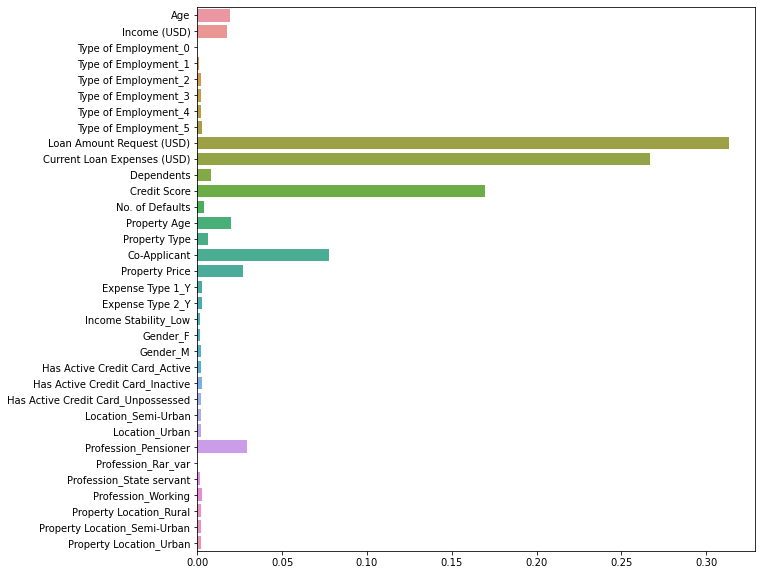

In [87]:
plt.figure(figsize=(10,10))
sns.barplot(y=X_train.columns,x=sel.feature_importances_)

In [88]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=40)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=40,
                 score_func=<function mutual_info_regression at 0x7f043b0ebc10>)

In [89]:
X_train.columns[selected_top_columns.get_support()]

Index(['Income (USD)', 'Type of Employment_4', 'Loan Amount Request (USD)',
       'Current Loan Expenses (USD)', 'Dependents', 'Credit Score',
       'Property Age', 'Co-Applicant', 'Property Price',
       'Income Stability_Low', 'Has Active Credit Card_Active',
       'Has Active Credit Card_Unpossessed', 'Location_Urban',
       'Profession_Pensioner'],
      dtype='object')

In [91]:
from sklearn.linear_model import LassoCV
lasso = LassoCV().fit(X_train.fillna(0), y_train)
importance = np.abs(lasso.coef_)

<AxesSubplot:>

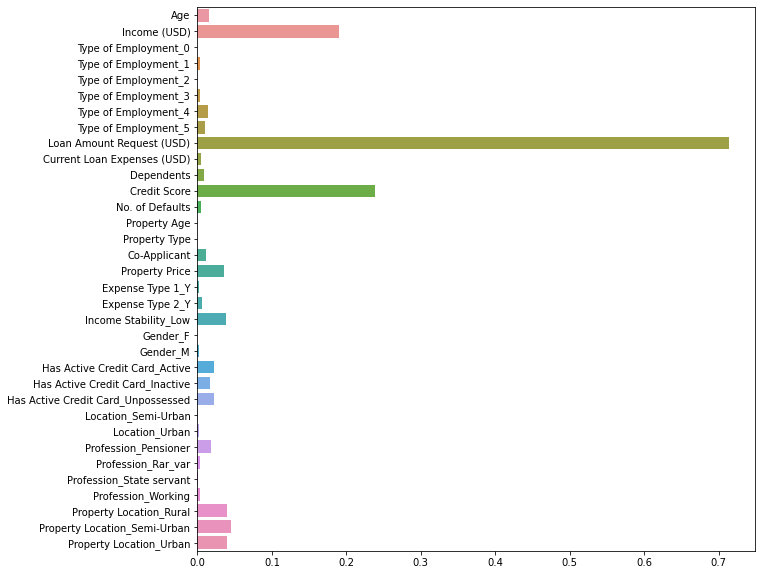

In [92]:
plt.figure(figsize=(10,10))
sns.barplot(y=X_train.columns,x=importance)

In [93]:
abc = pd.Series(importance)
abc.index = X_train.columns
abc.sort_values(ascending=False)

Loan Amount Request (USD)             0.713864
Credit Score                          0.238960
Income (USD)                          0.190442
Property Location_Semi-Urban          0.044909
Property Location_Rural               0.039974
Property Location_Urban               0.039410
Income Stability_Low                  0.038654
Property Price                        0.035135
Has Active Credit Card_Unpossessed    0.022287
Has Active Credit Card_Active         0.021715
Profession_Pensioner                  0.018033
Has Active Credit Card_Inactive       0.017188
Age                                   0.015122
Type of Employment_4                  0.014407
Co-Applicant                          0.011990
Type of Employment_5                  0.009503
Dependents                            0.008692
Expense Type 2_Y                      0.006453
Current Loan Expenses (USD)           0.005009
No. of Defaults                       0.004615
Type of Employment_3                  0.003974
Profession_Wo

**Observations**

1. According to correlation we have income and property age  as very high correlation and according to feature importance income has very high importance we can drop property age.

2. Property price plays and major role in getting loan sanctioned and have very hogh correlation with income current loan alotted and hence is an very important feature .

In [94]:
important_feaure_data=scaled_data.copy()

In [95]:
data_without_nan.head()

,Age,Income (USD),Type of Employment_0,Type of Employment_1,Type of Employment_2,Type of Employment_3,Type of Employment_4,Type of Employment_5,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD),Expense Type 1_Y,Expense Type 2_Y,Income Stability_Low,Gender_F,Gender_M,Has Active Credit Card_Active,Has Active Credit Card_Inactive,Has Active Credit Card_Unpossessed,Location_Semi-Urban,Location_Urban,Profession_Pensioner,Profession_Rar_var,Profession_State servant,Profession_Working,Property Location_Rural,Property Location_Semi-Urban,Property Location_Urban
0,56,1933.05,0,0,0,0,0,1,72809.58,72809.58,3.0,809.44,0,1933.05,4,1,119933.46,54607.18,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0
1,32,4952.91,0,0,0,0,1,0,46837.47,46837.47,1.0,780.40,0,4952.91,2,1,54791.00,37469.98,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0
2,65,988.19,0,0,0,0,1,0,45593.04,45593.04,1.0,833.15,0,988.19,2,0,72440.58,36474.43,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1
3,65,2223.30,0,0,0,0,1,0,80057.92,80057.92,2.0,832.70,1,NaN,2,1,121441.51,56040.54,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,31,2614.77,0,0,0,0,1,1,113858.89,113858.89,2.0,745.55,1,2614.77,4,1,208567.91,74008.28,0,1,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [96]:
important_feaure_data.drop(columns=['Dependents','Property Type','Property Age','Gender_F','Gender_M'],axis=1,inplace=True)

In [97]:
important_feaure_data.shape

(29660, 30)

In [98]:
scaled_data.drop('Property Age',axis=1,inplace=True)

In [99]:
data_without_nan.drop('Property Age',axis=1,inplace=True)

**Data Description**
1. Scaled_data ------>> It contains data that has been scaled with all columns present.

2. Data_without_nan------>> It contains data without scaling for someof the algorithms.

3. Important_feaure_data---->> It contains data based on features selected from feature importance  .

***We can use all above three data and observer the performance of our model***

In [100]:
scaled_data.to_csv('scaled_data',index=False,columns=scaled_data.columns)

In [101]:
important_feaure_data.to_csv('important_feaure_data',index=False,columns=important_feaure_data.columns)

In [102]:
data_without_nan.to_csv('data_without_nan',index=False,columns=data_without_nan.columns)